In [102]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score , confusion_matrix,roc_curve,roc_auc_score


import warnings
warnings.filterwarnings('ignore')

#import all the necessary liabriries requried if needed with insert more 

In [103]:
df = pd.read_csv(r'C:\Users\SOOQ ELASER\medical_cost_insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [104]:
df.isnull().sum()
#needs to check weather null value is present or not one more method df.isnull().sum()
#there is no null value in dataset

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [105]:
df.shape
#the shape of Data Set is 1338 rows and 7 columns

(1338, 7)

In [106]:
df.info()
#three types of data present float , int, object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [107]:
clean_data = {'sex': {'male' : 0 , 'female' : 1} ,
                 'smoker': {'no': 0 , 'yes' : 1},
                   'region' : {'northwest':0, 'northeast':1,'southeast':2,'southwest':3}
               }
data_copy = df.copy()
data_copy.replace(clean_data, inplace=True)

#converting object data type in int there are varies techniques like lableencoder , getdummies 

In [108]:
df = data_copy
#initalize to data to DF only

In [109]:
data_copy.describe()
##Using the describe method  can see the count, mean, standard deviation, minimum, maximum and inter quantile values of our dataset.

#huge difference in smoker from min till 75% is 0 afterword is 1 so chance having outlier
#huge difference in charges from 75% to maximun charges outliers is there
# IN BMI outliers is there but needs to check

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,1.514948,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.105572,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


<AxesSubplot:xlabel='charges', ylabel='Density'>

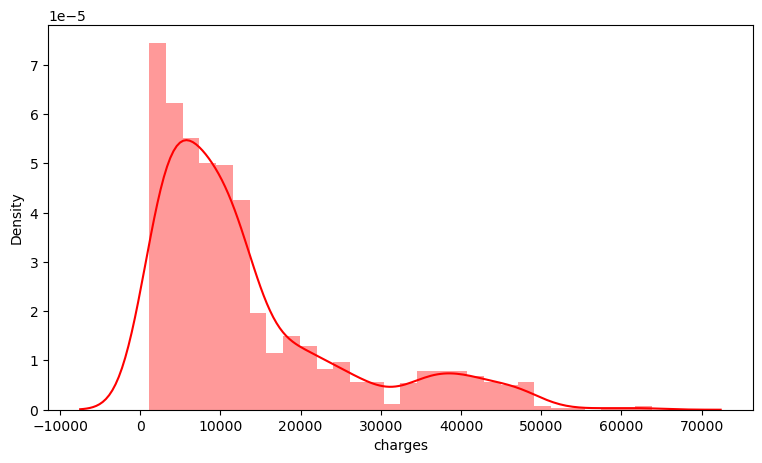

In [110]:
# Distribution of the charges
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.distplot(df.charges, color = 'r')
#The distribution of the charges is skewed to the right,we can applied  normal distribution.

Text(0.5, 1.0, 'Distribution of BMI')

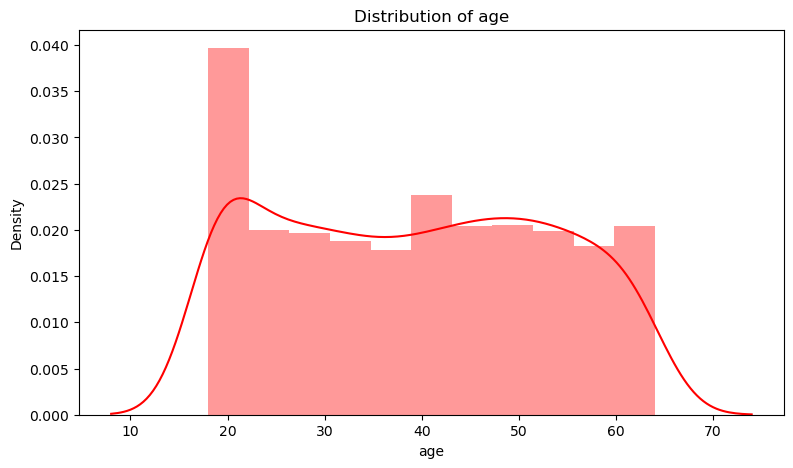

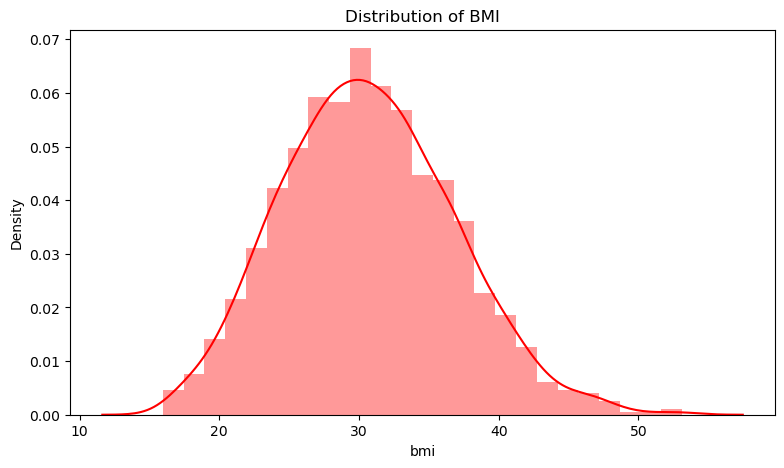

In [111]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.distplot(df.age,color='r').set_title('Distribution of age')

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.distplot(df.bmi,color='r').set_title('Distribution of BMI')
#it shows linear relationship between age, bmi with charges will check with pairplot

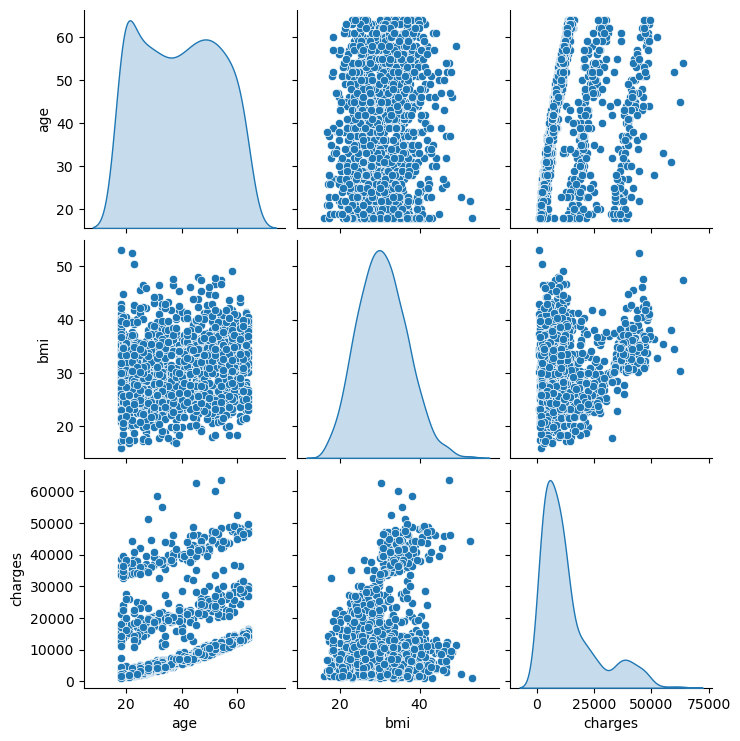

In [112]:
# Pairplot for Age, BMI, Charges
df_num = df[['age','bmi','charges']]
sns.pairplot(df_num, diag_kind = 'kde')
plt.show()
#The pairplot reveals that there is a linear relationship between age, bmi with charges

<AxesSubplot:xlabel='region', ylabel='charges'>

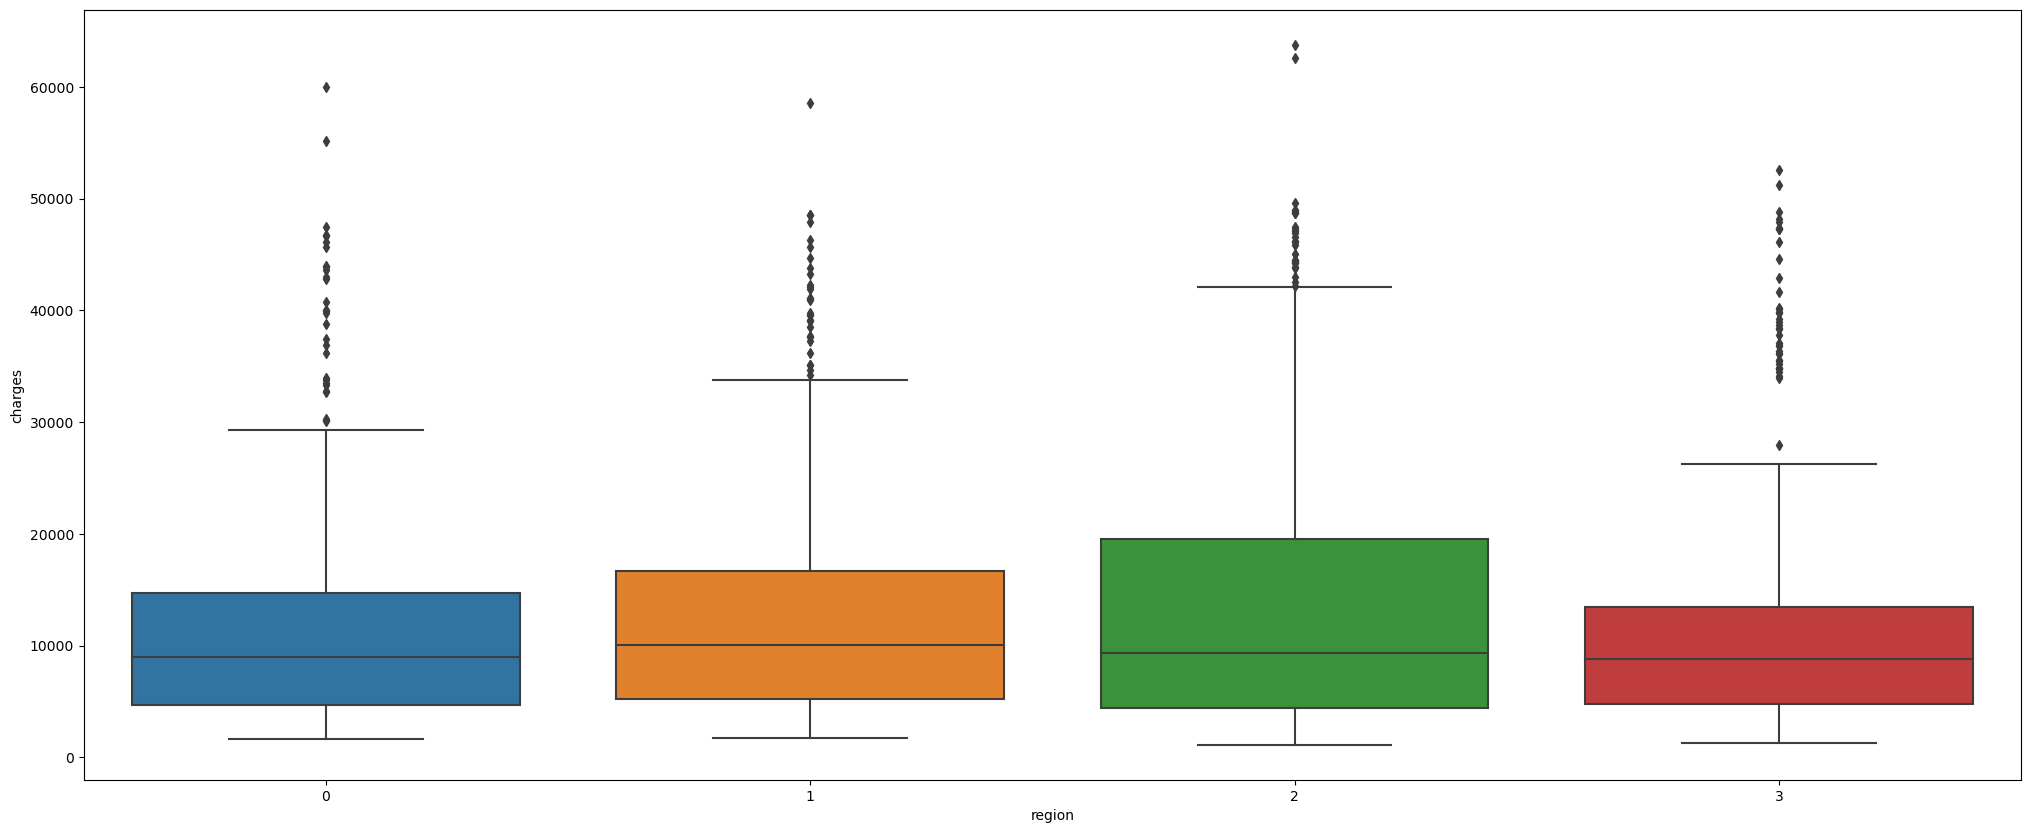

In [113]:

plt.figure (figsize = (25,10))
sns.boxplot(x = 'region', y = 'charges', data = df)
# highest data distribution between the 50th and 75th percentil in Southeast region

<AxesSubplot:xlabel='children', ylabel='charges'>

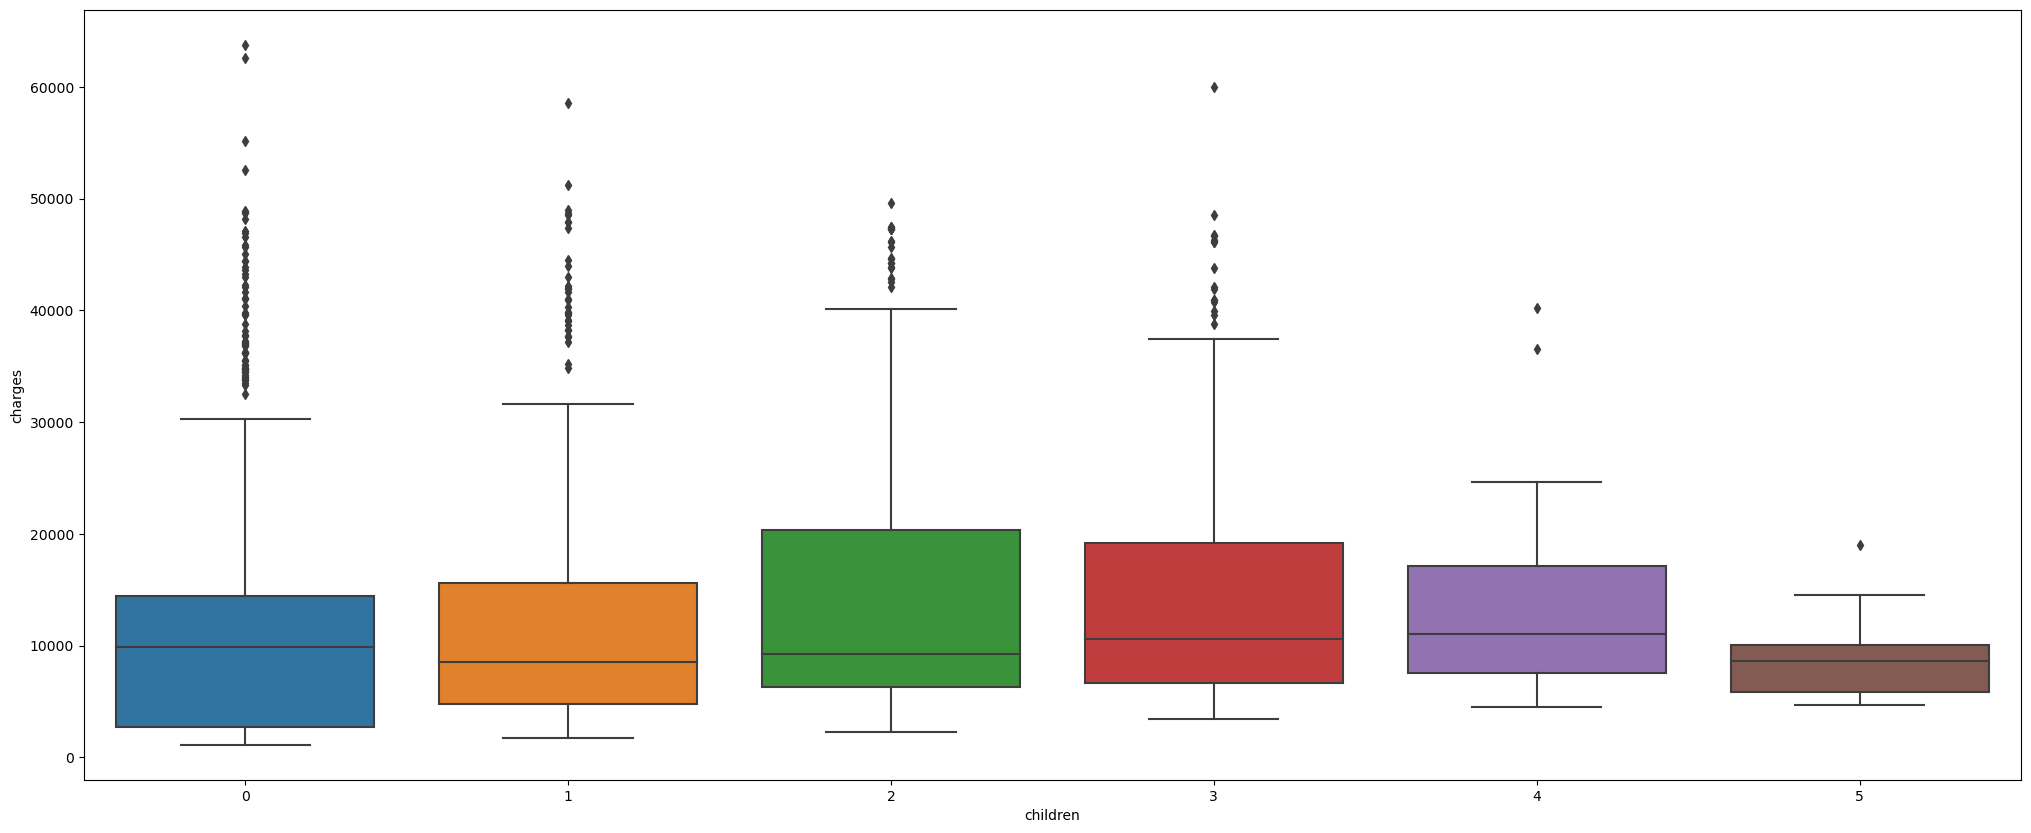

In [114]:
plt.figure (figsize = (25,10))
sns.boxplot(x = 'children', y = 'charges', data = df)
#number 2 and 3 has the highest distribution between 50 to 75

<AxesSubplot:xlabel='sex', ylabel='charges'>

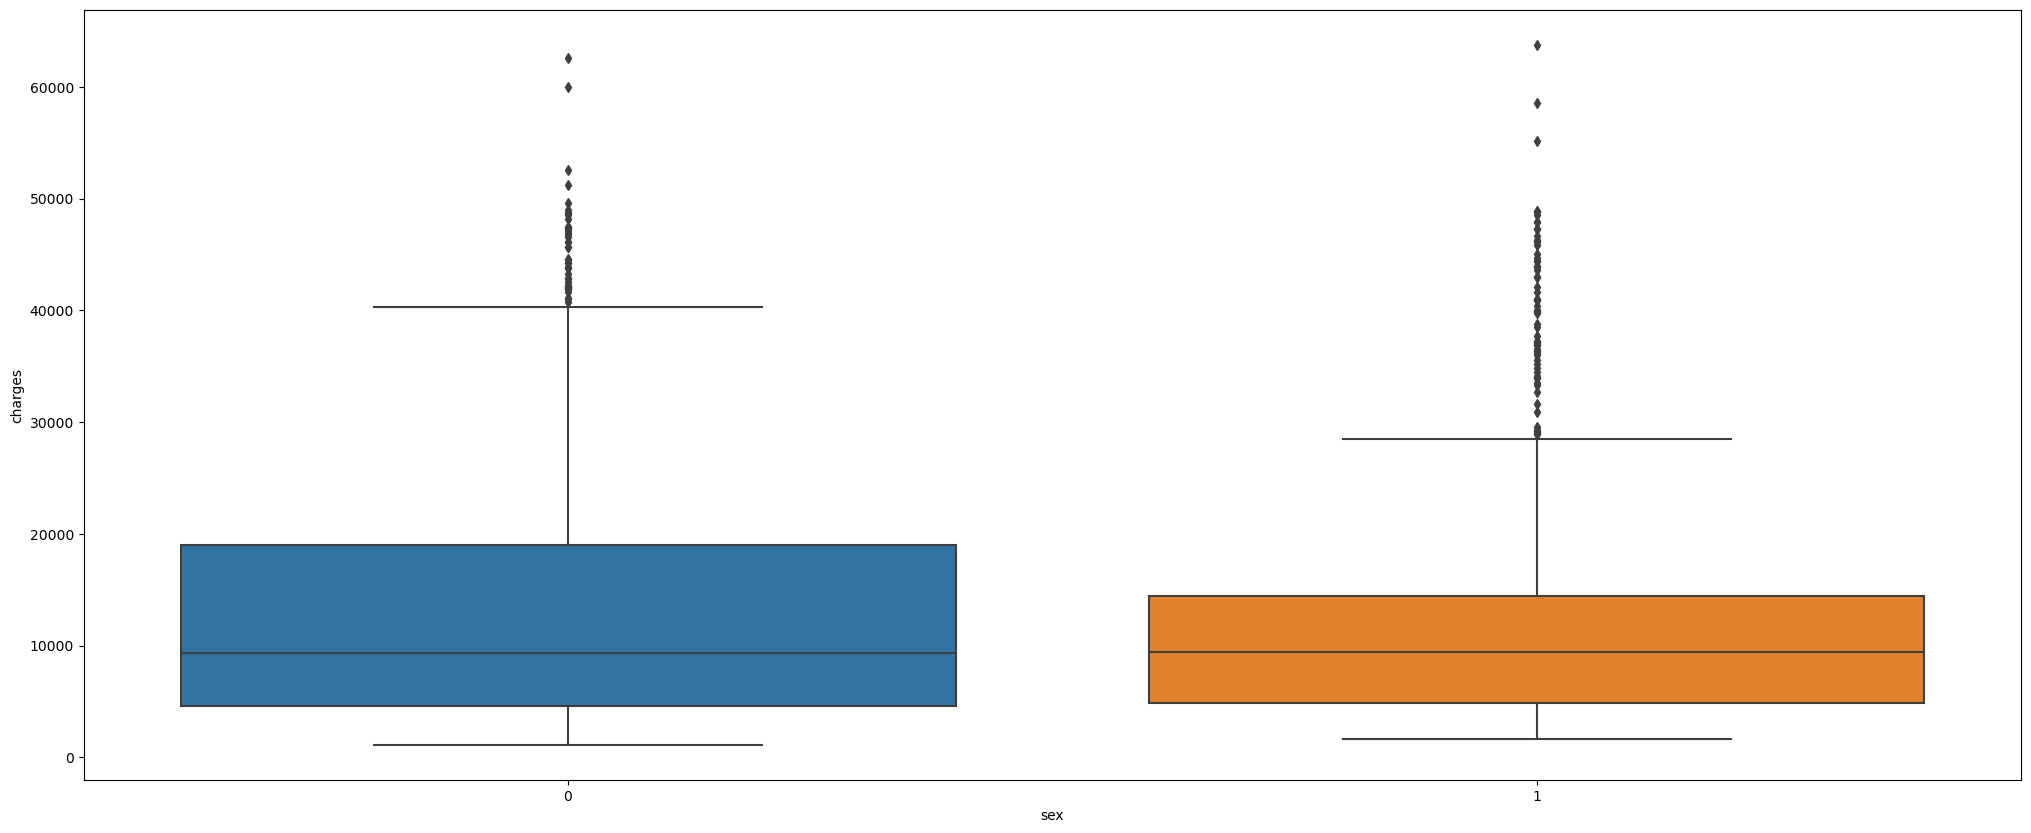

In [115]:
plt.figure (figsize = (25,10))
sns.boxplot(x = 'sex', y = 'charges', data = df)
#the data is higer inclined towards male compared to female 

<AxesSubplot:xlabel='smoker', ylabel='charges'>

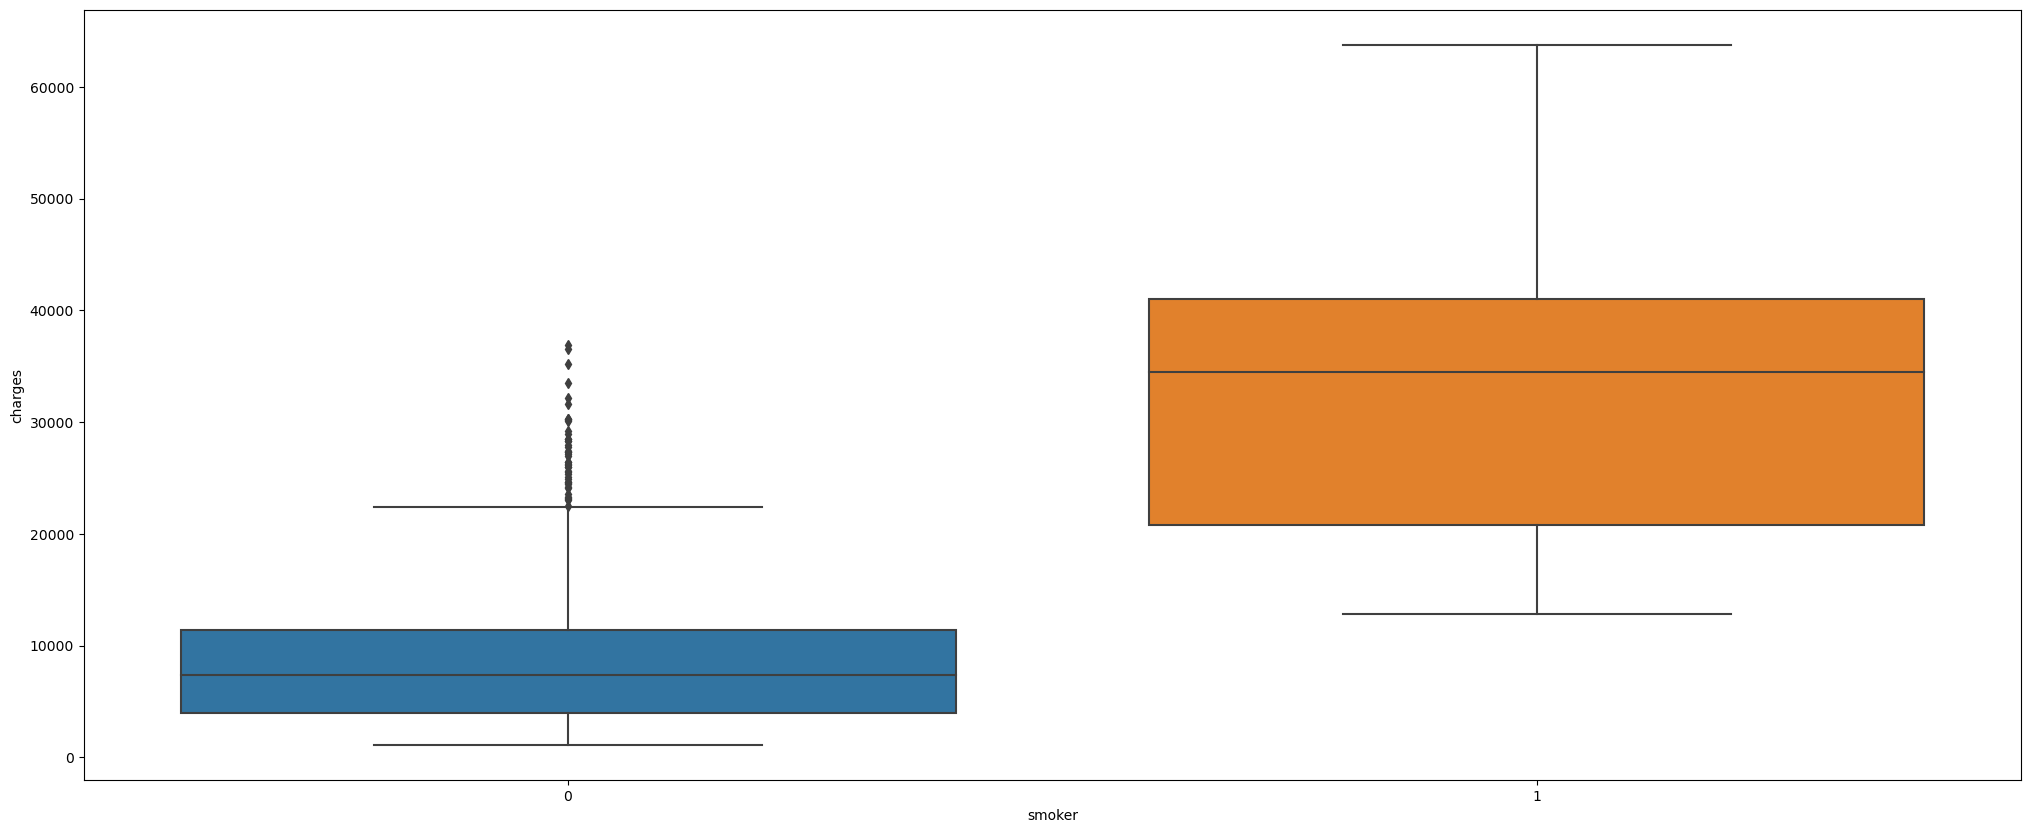

In [116]:
plt.figure (figsize = (25,10))
sns.boxplot(x = 'smoker', y = 'charges', data = df)
# amoking rate is very higer as compare to non smoker

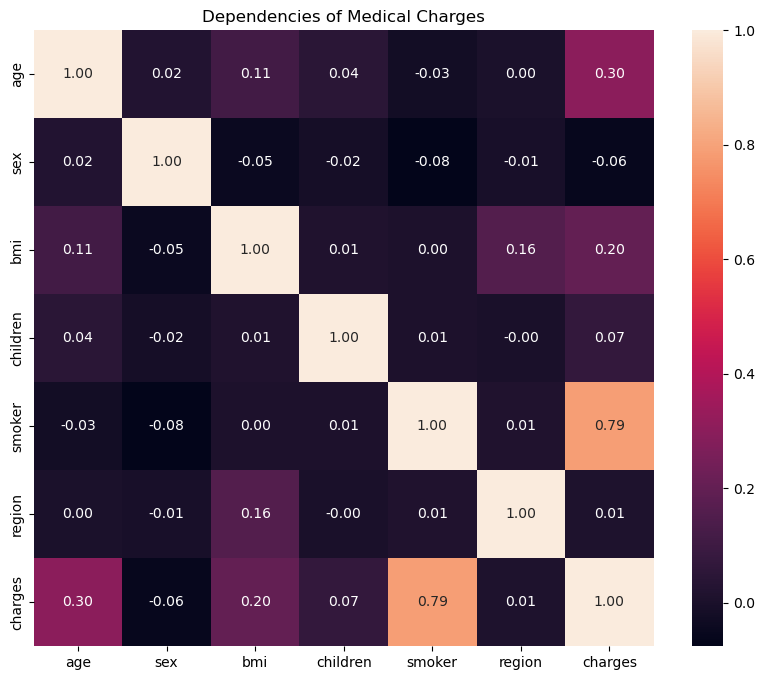

In [117]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr,annot=True,fmt=".2f",ax=ax)
plt.title("Dependencies of Medical Charges")
plt.show()
#Smoker, BMI and Age are most important factor that determnines - Charges

In [118]:
df.skew()

age         0.055673
sex         0.020951
bmi         0.284047
children    0.938380
smoker      1.464766
region     -0.037853
charges     1.515880
dtype: float64

In [119]:
from scipy.stats import zscore
#importing zscore
# Z score method for removing outlier the acceptable range is  +/-0.5 value of skewness.

z=np.abs(zscore(df))
threshold=3
np.where(z>3)

df=df[(z<3).all(axis=1)]
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,0,21984.47061
4,32,0,28.880,0,0,0,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,0,10600.54830
1334,18,1,31.920,0,0,1,2205.98080
1335,18,1,36.850,0,0,2,1629.83350
1336,21,1,25.800,0,0,3,2007.94500


<AxesSubplot:title={'center':'Region vs Charge'}, xlabel='region', ylabel='charges'>

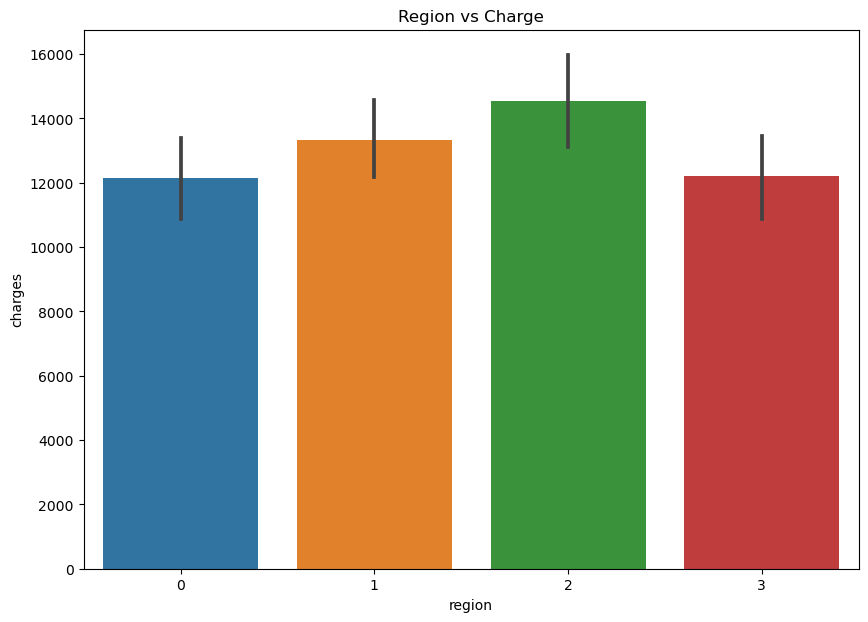

In [120]:
#just region wise charges we can check 
plt.figure(figsize=(10,7))
plt.title('Region vs Charge')
sns.barplot(x='region',y='charges',data=df)

<AxesSubplot:title={'center':'Smoker vs Charge'}, xlabel='smoker', ylabel='charges'>

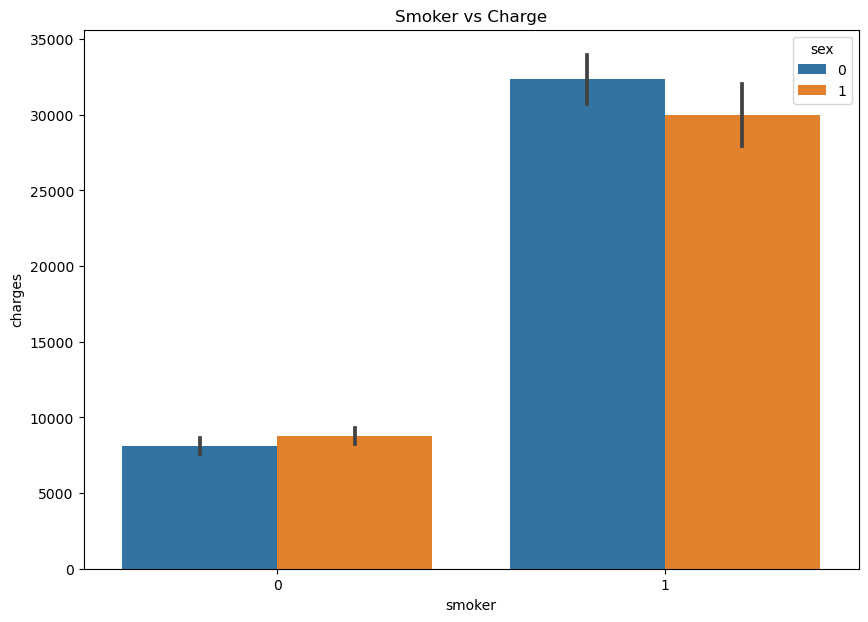

In [121]:
#smoking wise chages
plt.figure(figsize=(10,7))
plt.title('Smoker vs Charge')
sns.barplot(x='smoker',y='charges',data=df,hue='sex')


In [122]:
#all necesary libariers
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV

In [123]:
#make feature and lable seperatly
x = df.drop('charges',axis = 1)
y = df['charges']

In [124]:
#standardize data
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)

In [125]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(x_scaler, y, test_size=0.3, random_state=42)

In [126]:
# Linear Regression:
from sklearn.linear_model import LinearRegression
LinearRegression = LinearRegression()
LinearRegression = LinearRegression.fit(X_train, y_train)

# Prediction:
y_pred = LinearRegression.predict(X_test)

# Scores:
print('r2_score:', r2_score(y_test, y_pred))
print('mean_squared_error:',mean_squared_error(y_test, y_pred))
print('Squareroot_mean_squared_error',np.sqrt(mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Log Error  ',np.log(np.sqrt(mean_squared_error(y_test, y_pred))))

r2_score: 0.7731939056769771
mean_squared_error: 32940481.78038187
Squareroot_mean_squared_error 5739.379912532527
Root Mean Squared Log Error   8.655106454302523


In [127]:
# Ridge:
from sklearn.linear_model import Ridge
Ridge = Ridge()
Ridge = Ridge.fit(X_train, y_train)

# Prediction:
y_pred = Ridge.predict(X_test)

# Scores:
print('r2_score:', r2_score(y_test, y_pred))
print('mean_squared_error:',mean_squared_error(y_test, y_pred))
print('Squareroot_mean_squared_error',np.sqrt(mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Log Error  ',np.log(np.sqrt(mean_squared_error(y_test, y_pred))))

r2_score: 0.7731490177601992
mean_squared_error: 32947001.136086114
Squareroot_mean_squared_error 5739.947833916795
Root Mean Squared Log Error   8.655205401104508


In [128]:
# Lasso:
from sklearn.linear_model import Lasso
Lasso = Lasso()
Lasso = Lasso.fit(X_train, y_train)

# Prediction:
y_pred = Lasso.predict(X_test)

# Scores:
print('r2_score:', r2_score(y_test, y_pred))
print('mean_squared_error:',mean_squared_error(y_test, y_pred))
print('Squareroot_mean_squared_error',np.sqrt(mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Log Error  ',np.log(np.sqrt(mean_squared_error(y_test, y_pred))))

r2_score: 0.7731797716204716
mean_squared_error: 32942534.558691
Squareroot_mean_squared_error 5739.558742507214
Root Mean Squared Log Error   8.655137612230982


In [129]:
# Random Forest Regressor:
from sklearn.ensemble import RandomForestRegressor
RandomForestRegressor = RandomForestRegressor()
RandomForestRegressor = RandomForestRegressor.fit(X_train, y_train)

# Prediction:
y_pred = RandomForestRegressor.predict(X_test)
# Scores:
print('r2_score:', r2_score(y_test, y_pred))
print('mean_squared_error:',mean_squared_error(y_test, y_pred))
print('Squareroot_mean_squared_error',np.sqrt(mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Log Error  ',np.log(np.sqrt(mean_squared_error(y_test, y_pred))))

r2_score: 0.8701483699274938
mean_squared_error: 18859172.489714194
Squareroot_mean_squared_error 4342.714875479876
Root Mean Squared Log Error   8.376254978866859


In [130]:
Decision_Tree = DecisionTreeRegressor()
Decision_Tree = Decision_Tree.fit(X_train, y_train)

# Prediction:
y_pred = Decision_Tree.predict(X_test)

# Scores:
print('r2_score:', r2_score(y_test, y_pred))
print('mean_squared_error:',mean_squared_error(y_test, y_pred))
print('Squareroot_mean_squared_error',np.sqrt(mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Log Error  ',np.log(np.sqrt(mean_squared_error(y_test, y_pred))))

r2_score: 0.7237032910857861
mean_squared_error: 40128316.362636045
Squareroot_mean_squared_error 6334.691497037251
Root Mean Squared Log Error   8.753796393390637


In [131]:
final_values = pd.DataFrame({'Actual values': y_test, 'Predicted values': y_pred})
final_values

,Actual values,Predicted values
1172,11093.62290,24227.33724
1069,10928.84900,10436.09600
1001,34472.84100,36197.69900
821,2680.94930,21595.38229
1219,7537.16390,7281.50560
...,...,...
330,48517.56315,47403.88000
935,12233.82800,11842.44200
540,6196.44800,4762.32900
1183,9447.38240,25656.57526
